In [19]:
import pandas as pd
from geopy.distance import distance
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# !pip install geopy

In [6]:
statesDF=pd.read_csv('https://gist.githubusercontent.com/rebecca-sich/1c422acc1b222b8a04fcd3cfae79bc18/raw/37d0b5d60a49b38753cad360e803d318a27a65fe/states.csv')

In [8]:
distancesDF = pd.DataFrame(columns=["state1", "state2", "distance"])

# Line 22 can be modified to calculate whichever distance is preferred. 

for state1, lat1, lon1 in zip(statesDF.state, statesDF.latitude, statesDF.longitude):
    for state2, lat2, lon2 in zip(statesDF.state, statesDF.latitude, statesDF.longitude):
        new_data= pd.DataFrame({
            "state1": [state1],
            "state2": [state2],
            "distance": [distance((lat1, lon1), (lat2, lon2)).miles]
            });
        distancesDF = pd.concat([distancesDF, new_data], ignore_index=True)

In [14]:
pdist=distancesDF.pivot(index='state1',columns='state2',values='distance')

<Axes: xlabel='state2', ylabel='state1'>

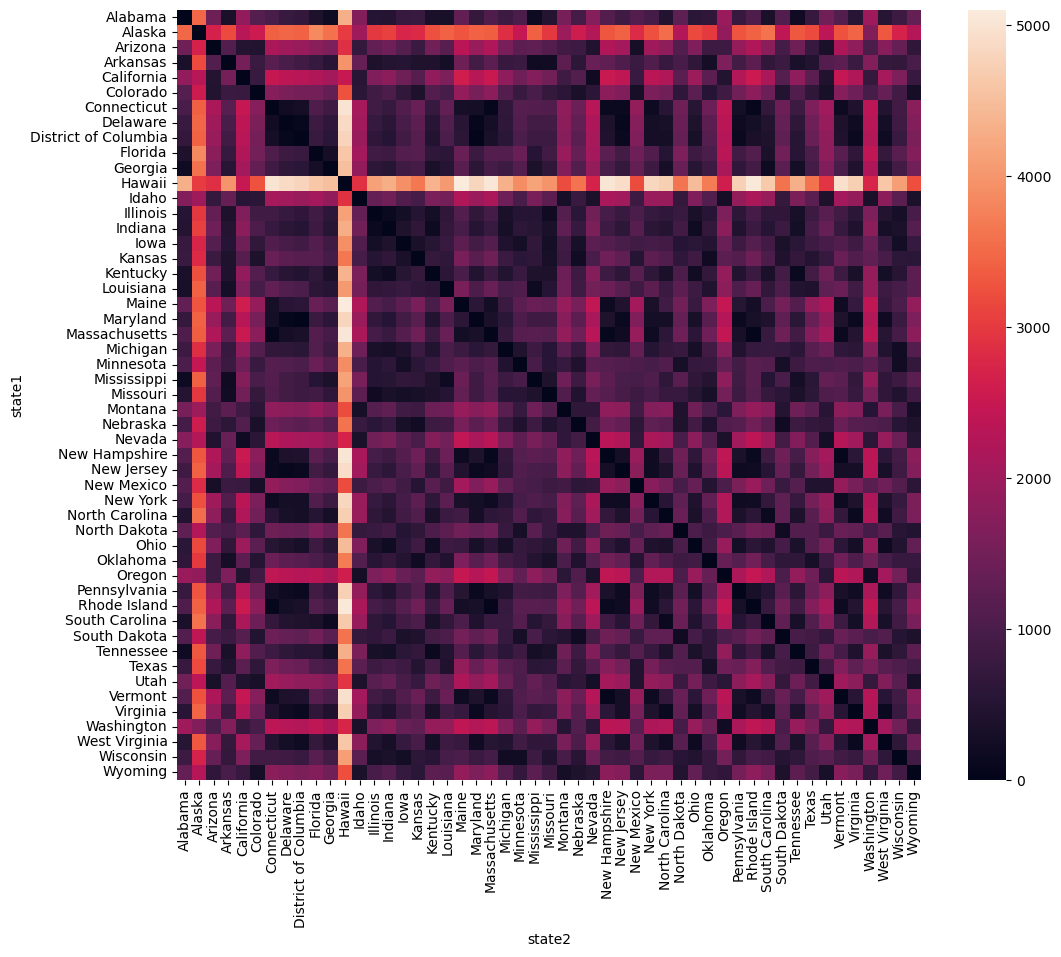

In [22]:
_,ax=plt.subplots(figsize=(12,10))
sns.heatmap(pdist,ax=ax)